In [1]:
import os, sys, glob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn

### Data from Kaggle
- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn import datasets, tree
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold, cross_validate

import pydotplus
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

In [4]:
arqs={ n:nome for n,nome in enumerate(glob.glob('archive/*.csv')) }
arqs

{0: 'archive\\creditcard.csv'}

In [190]:
df = pd.read_csv(arqs[0], sep=',')

In [191]:
df.shape

(284807, 31)

In [192]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [193]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [195]:
df.Class.unique()

array([0, 1], dtype=int64)

In [196]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

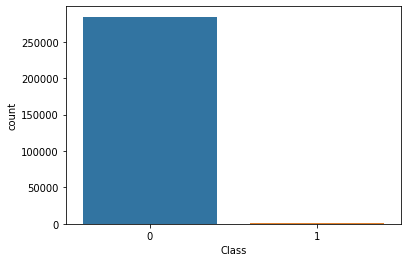

In [197]:
srn.countplot(df['Class'])

In [198]:
df['Class'].value_counts(1)

0    0.998273
1    0.001727
Name: Class, dtype: float64

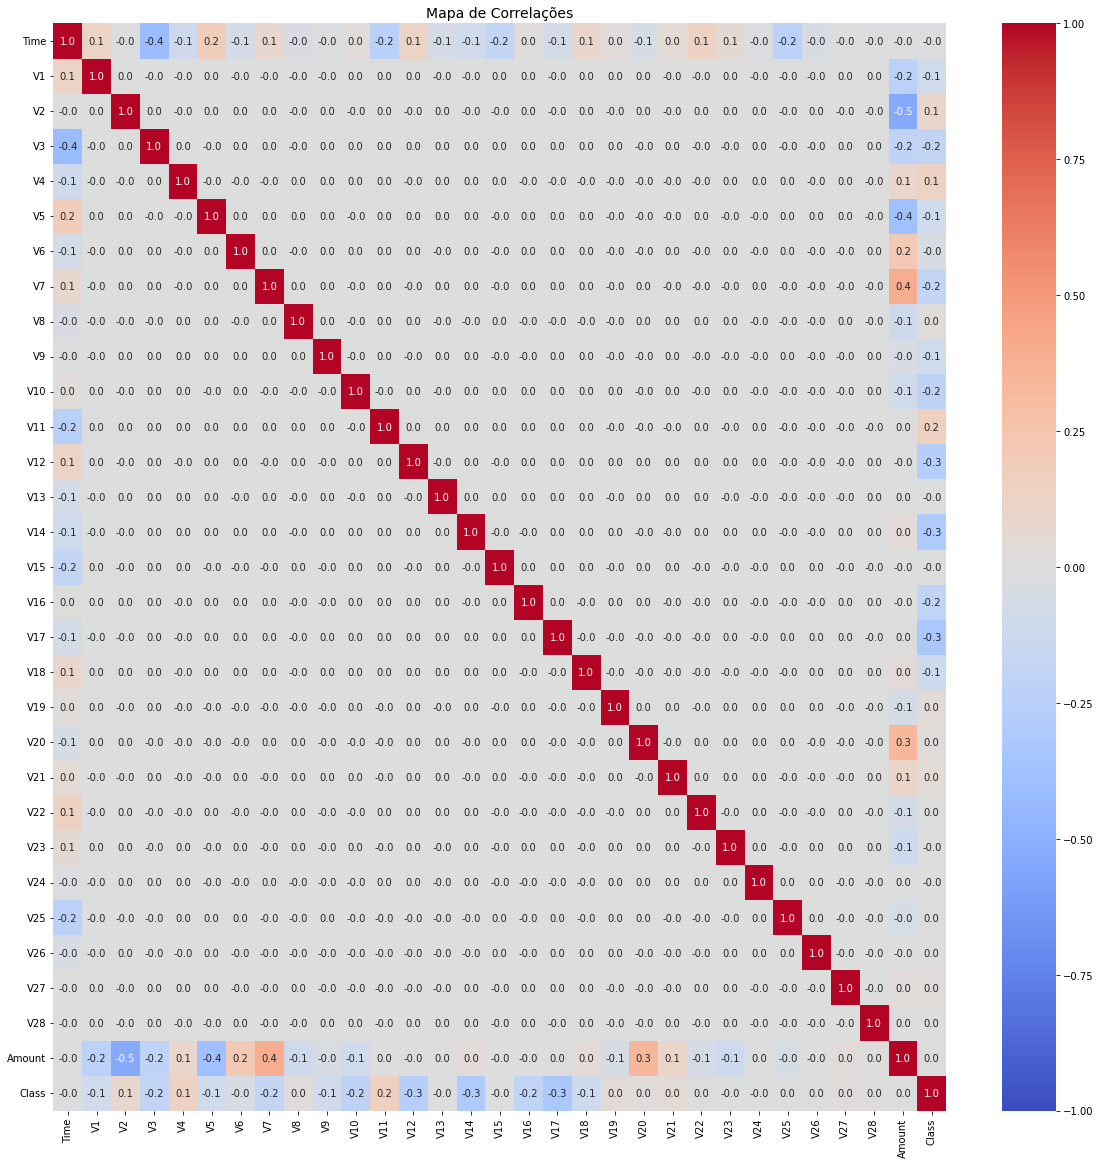

In [199]:
f, ax = plt.subplots(figsize = (20,20))
srn.heatmap(df.corr(), annot=True, fmt='.1f',
            ax=ax, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de Correlações', size=14);

In [200]:
flt = np.abs(df.corr()['Class']) > .2

In [201]:
corr_feat = df.corr().columns[flt].tolist()

In [202]:
corr_feat

['V10', 'V12', 'V14', 'V17', 'Class']

In [203]:
predictor = corr_feat


In [204]:
df = pd.concat([df[df.Class == 0][0:1000], df[df.Class == 1] ])

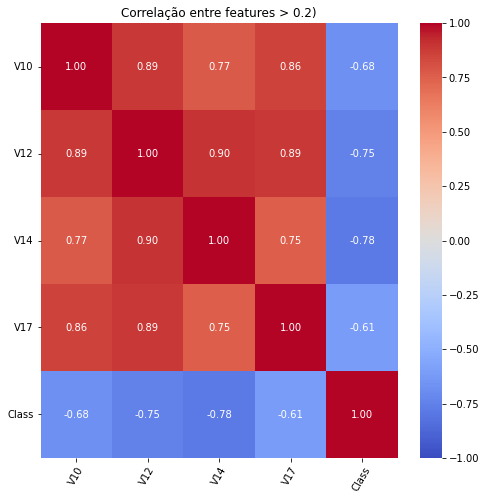

In [205]:
f, ax = plt.subplots(figsize = (8,8))
srn.heatmap(df[predictor].corr(), annot=True, fmt='.2f',
           ax=ax, cmap='coolwarm',vmin=-1,vmax=1)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.title('Correlação entre features > 0.2)');

In [206]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'
def radar_chart(cols, filter_by="50%", figsize=(800, 800), font_size=10,  margin_dim=(None, None, None, None), **dfs):
    """
    Plots a radar chart, provides the visualization of the characteristics in a single or multiple dataframes.
    Parameters
    ----------
    margin_dim : Tuple(float, float, float, float), default (None, None, None, None)
        Sets the margin for the graph.
    cols : list
        Columns to be analyzed
    filter_by : str, default "50%"
        This is a filter parameter,
        which will be applied on the results of the describe() that is applied on the dataframe.
        Receives the following parameters:'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'.
    figsize : Tuple(float, float), default (None, None)
        Width, height.
    font_size : int, default 10
        The size of all the text.
    **dfs : DataFrames
        Dataframes that must be plotted
    """
    fig = go.Figure()
    for key, df in dfs.items():
        fig.add_trace(go.Scatterpolar(
            r=df[cols].describe().loc[filter_by].values.tolist()
            + df[cols].describe().loc[filter_by].values.tolist()[:1],
            theta=df[cols].describe().columns.tolist() + df[cols].describe().columns.tolist()[:1],
            name=key,
            showlegend=True,
            opacity=1,))
    fig.update_layout(template="none",
                      polar=dict(
                          radialaxis=dict(color="dimgray",
                                          visible=True,
                                          gridcolor="darkgrey"
                                          )),
                      width=figsize[0],
                      height=figsize[1],
                      font=dict(color="black", size=font_size),
                      margin=dict(t=margin_dim[0], b=margin_dim[1], l=margin_dim[2], r=margin_dim[3]),
                      showlegend=True)
    fig.show()

In [207]:
predictor[0:4]

['V10', 'V12', 'V14', 'V17']

In [208]:
radar_chart(cols=predictor[0:4], filter_by='50%',
           Normal = df[df['Class']==0],
           Fraude = df[df['Class']==1],)

In [209]:
def melt(dataset, param):
    data_melted = pd.melt(dataset, id_vars=param,
                     var_name="features",
                     value_name="value")
    return data_melted

def boxplot(dataset, param):
    plt.figure(figsize= (14,8))
    srn.boxplot(x="features", y="value", hue=param, data=dataset)
    plt.xticks(rotation = 90)
    return plt.show()

def pairplot(dataset, param):
    srn.pairplot(dataset, diag_kind='kde', markers='+', hue=param);

In [210]:
melt(df, "Class")

,Class,features,value
0,0,Time,0.00
1,0,Time,0.00
2,0,Time,1.00
3,0,Time,1.00
4,0,Time,2.00
...,...,...,...
44755,1,Amount,390.00
44756,1,Amount,0.76
44757,1,Amount,77.89
44758,1,Amount,245.00


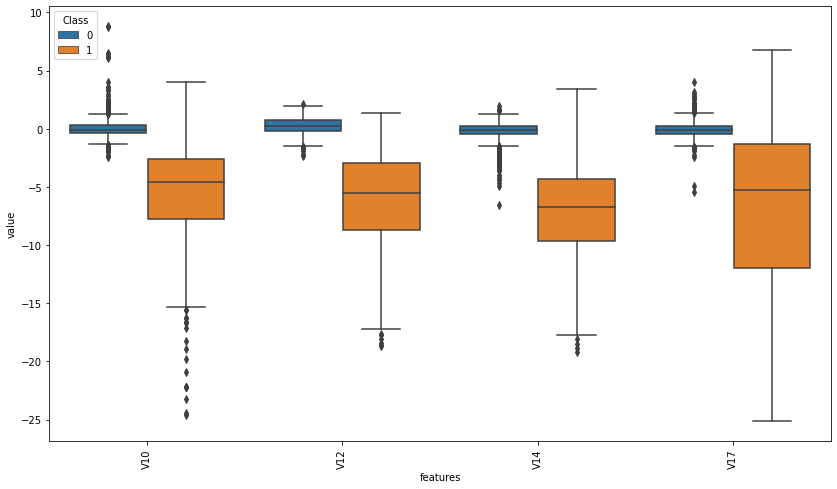

In [211]:
boxplot(melt(df[corr_feat], "Class"), "Class")

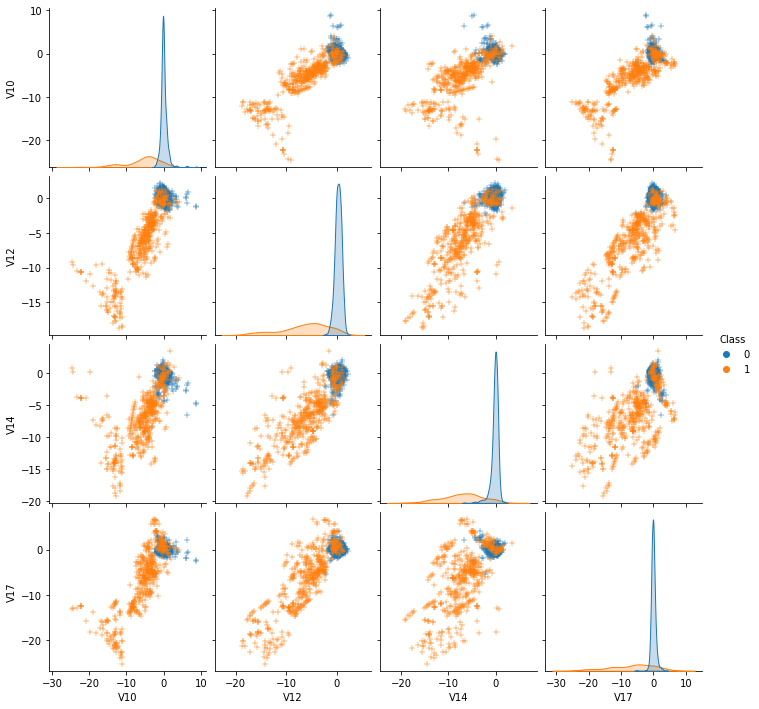

In [212]:
pairplot(df[predictor], "Class")

In [213]:
feat = predictor

dataM = df[df.Class ==1]
dataB = df[df.Class ==0]

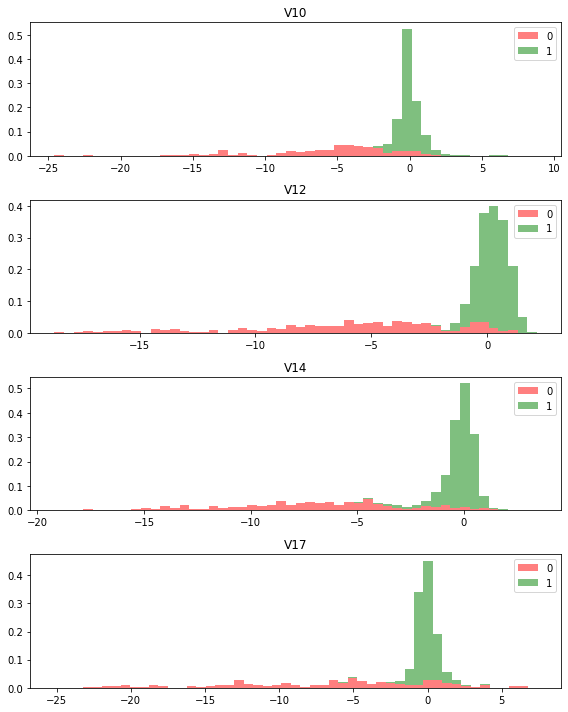

In [214]:
#plt.rcParams.update({'font.size': 8})
f, axes = plt.subplots(nrows=4, ncols=1, figsize=(8,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[feat[i]]) - min(df[feat[i]]))/50
    ax.hist([dataM[feat[i]],dataB[feat[i]]], 
            bins=np.arange(min(df[feat[i]]), max(df[feat[i]]) + binwidth, binwidth), 
            alpha=0.5,stacked=True, density=True, label=[0,1],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(feat[i])
plt.tight_layout()
plt.show()

In [215]:
X = df


In [216]:
X.shape

(1492, 31)

In [217]:
y = X.Class

# Construção do Modelo

In [218]:
X = X.drop(['Class'], axis=1)

In [219]:
X.shape, y.shape

((1492, 30), (1492,))

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [221]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [222]:
df['Class'] = y_train

In [223]:
def plot_cm(cm, normalize=False):
    plt.figure()
    if normalize:
        annot = cm / cm.sum(axis=1)[:, np.newaxis]
    else:
        annot = cm
        
    srn.heatmap(cm / cm.sum(axis=1)[:, np.newaxis],
                   annot=annot,
               cbar=False,
               fmt='.2g' if normalize else 'd',
               cmap=srn.light_palette('green', n_colors=200),
               xticklabels=np.sort(y_test.unique()),
               yticklabels=np.sort(y_test.unique()))

# LogisticRegression

In [224]:
model = Pipeline([
        ('lrModel', LogisticRegression(n_jobs=1, C=1e5, max_iter=1000, verbose=2))
    ])

In [225]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Pipeline(steps=[('lrModel',
                 LogisticRegression(C=100000.0, max_iter=1000, n_jobs=1,
                                    verbose=2))])

In [226]:
parameters = {
    'lrModel__max_iter' : list(range(50, 200, 2000))
}

grid = GridSearchCV( model,
                      parameters,
                      verbose=3,
                      cv=StratifiedKFold(5),
                      return_train_score=True,
                      scoring={
                          'f1_macro':'f1_macro',
                          'recall_macro': 'recall_macro',
                          'precision_macro':'precision_macro'
                      },
                      refit='f1_macro',
                     n_jobs=3
                    )

In [227]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('lrModel',
                                        LogisticRegression(C=100000.0,
                                                           max_iter=1000,
                                                           n_jobs=1,
                                                           verbose=2))]),
             n_jobs=3, param_grid={'lrModel__max_iter': [50]}, refit='f1_macro',
             return_train_score=True,
             scoring={'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro'},
             verbose=3)

In [228]:
grid.best_params_, grid.best_score_

({'lrModel__max_iter': 50}, 0.9891746733319187)

In [229]:
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.98      1.00      0.99        46

    accuracy                           0.99       150
   macro avg       0.99      1.00      0.99       150
weighted avg       0.99      0.99      0.99       150



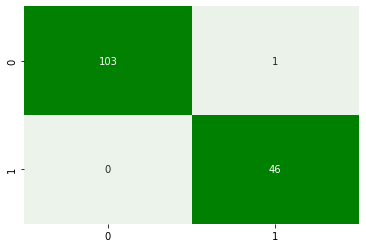

In [230]:
cm = confusion_matrix(y_test, grid.best_estimator_.predict(X_test))
plot_cm(cm)

In [231]:
print('Acurácia geral: %s' % accuracy_score(y_train, grid.best_estimator_.predict(X_train)))

Acurácia geral: 0.9918032786885246


# DecisionTreeClassifier

In [242]:
model = DecisionTreeClassifier()

In [243]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [244]:
parameters = {"max_depth": np.arange(3, 10),
               "criterion": ["gini", "entropy"],
               "min_samples_split": np.arange(2, 5),
               "min_samples_leaf": np.arange(2, 5),
               }

grid = GridSearchCV( model,
                      parameters,
                      verbose=3,
                      cv=StratifiedKFold(5),
                      return_train_score=True,
                      scoring={
                          'f1_macro':'f1_macro',
                          'recall_macro': 'recall_macro',
                          'precision_macro':'precision_macro'
                      },
                      refit='f1_macro',
                     n_jobs=3
                    )

In [245]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])},
             refit='f1_macro', return_train_score=True,
             scoring={'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro'},
             verbose=3)

In [246]:
grid.best_params_, grid.best_score_

({'criterion': 'gini',
  'max_depth': 3,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.9983129534331082)

In [247]:
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        46

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



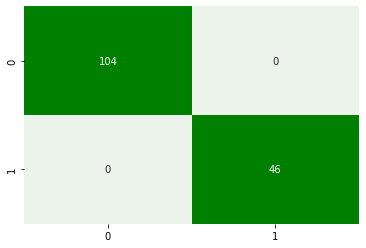

In [248]:
cm = confusion_matrix(y_test, grid.best_estimator_.predict(X_test))
plot_cm(cm)

In [249]:
print('Acurácia geral: %s' % accuracy_score(y_test, grid.best_estimator_.predict(X_test)))

Acurácia geral: 1.0


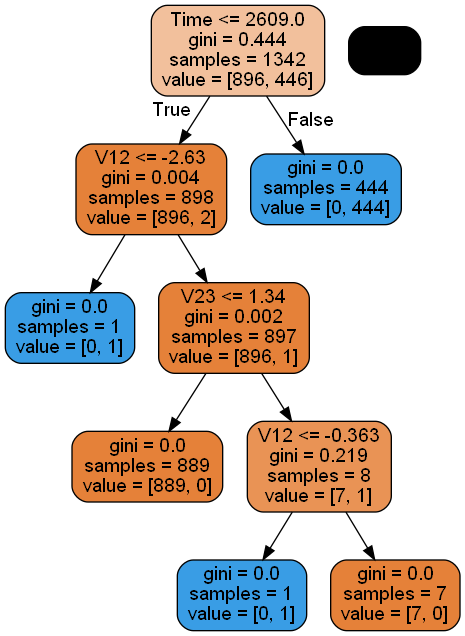

In [250]:
# Create DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=X.columns.to_list())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
graph.write_png('arvore.png')
Image('arvore.png')

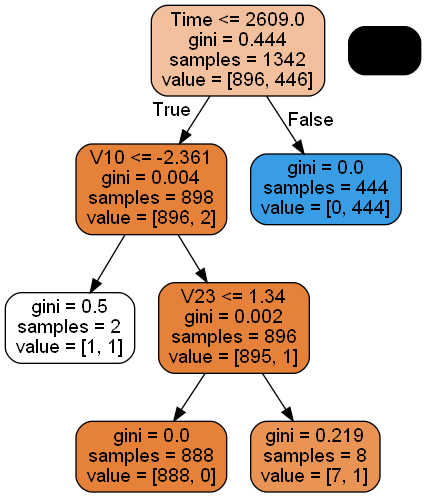

In [251]:
# Create DOT data
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=X.columns.to_list())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
graph.write_png('arvore.png')
Image('arvore.png')

In [252]:
grid.best_params_, grid.best_score_

({'criterion': 'gini',
  'max_depth': 3,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.9983129534331082)

# RandomForestClassifier

In [232]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=6)

In [233]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=6, min_samples_split=25)

In [236]:
parameters = {"max_depth": np.arange(3, 10),
               "criterion": ["gini", "entropy"],
               "min_samples_split": np.arange(2, 5),
               "min_samples_leaf": np.arange(2, 5),
               }

grid = GridSearchCV( model,
                      parameters,
                      verbose=3,
                      cv=StratifiedKFold(5),
                      return_train_score=True,
                      scoring={
                          'f1_macro':'f1_macro',
                          'recall_macro': 'recall_macro',
                          'precision_macro':'precision_macro'
                      },
                      refit='f1_macro',
                     n_jobs=3
                    )

In [237]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=7, max_features=6,
                                              min_samples_split=25),
             n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])},
             refit='f1_macro', return_train_score=True,
             scoring={'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro'},
             verbose=3)

In [238]:
grid.best_params_, grid.best_score_

({'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 3},
 0.9991564767165542)

In [239]:
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.98      1.00      0.99        46

    accuracy                           0.99       150
   macro avg       0.99      1.00      0.99       150
weighted avg       0.99      0.99      0.99       150



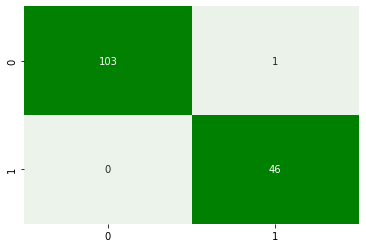

In [240]:
cm = confusion_matrix(y_test, grid.best_estimator_.predict(X_test))
plot_cm(cm)

In [241]:
print('Acurácia geral: %s' % accuracy_score(y_test, grid.best_estimator_.predict(X_test)))

Acurácia geral: 0.9933333333333333


# Teste de Hipótese

In [253]:
from pingouin import mwu
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [264]:
col = df.columns
hip_test = df

In [261]:
hip_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,NaN
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


In [262]:
good = hip_test[hip_test['Class'] == 1]
bad = hip_test[hip_test['Class'] == 0]

V13
As populações são IGUAIS (p=0.9295209439956341)



<Figure size 432x288 with 0 Axes>

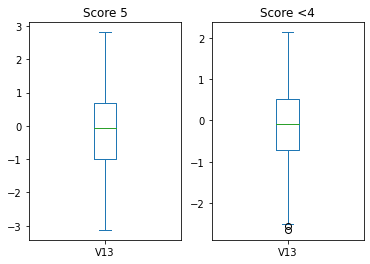



V23
As populações são IGUAIS (p=0.6962772684623013)



<Figure size 432x288 with 0 Axes>

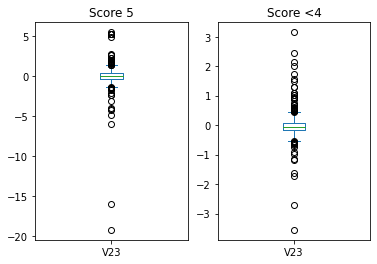



V25
As populações são IGUAIS (p=0.26109780463769117)



<Figure size 432x288 with 0 Axes>

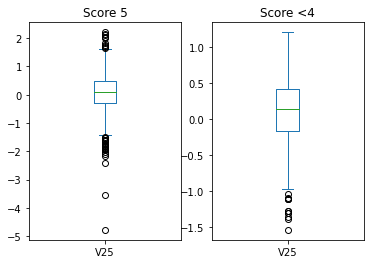



V26
As populações são IGUAIS (p=0.07314823942680584)



<Figure size 432x288 with 0 Axes>

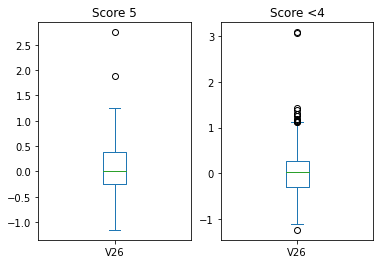



Amount
As populações são IGUAIS (p=0.1509862147607266)



<Figure size 432x288 with 0 Axes>

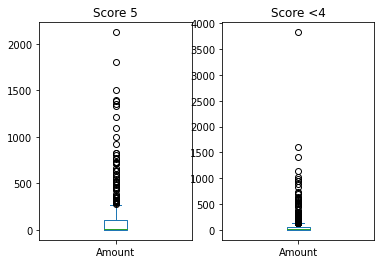




ATRIBUTOS COMPARADOS:  31
DISTRIBUIÇÕES IGUAIS:  5
DISTRIBUIÇÕES DIFERENTES:  26


In [265]:
iguais = 0
diferentes = 0
for x in col:
    
    results2 = mwu(good[col][x],
                   bad[col][x],
                   alternative='two-sided')
    if results2['p-val'][0] < 0.05:
        
#         print(x)
#         print("As populações são DIFERENTES (p={p})".format(p =results2['p-val'][0]))
#         print()
#         plt.figure()
#         fig, (ax1,ax2) = plt.subplots(1,2)
#         good[col][x].plot(kind='box', ax=ax1)
#         bad[col][x].plot(kind='box', ax=ax2)
#         ax1.set_title('Score 5')
#         ax2.set_title('Score <4')
#         plt.show()
        diferentes+=1
#         print("\n")
        continue
    else:
         print(x)
         print("As populações são IGUAIS (p={p})".format(p =results2['p-val'][0]))
         print()
         plt.figure()
         fig, (ax1,ax2) = plt.subplots(1,2)
         good[col][x].plot(kind='box', ax=ax1)
         bad[col][x].plot(kind='box', ax=ax2)
         ax1.set_title('Score 5')
         ax2.set_title('Score <4')
         plt.show()
         iguais+=1
         print("\n")
print("")
print("ATRIBUTOS COMPARADOS: ",len(col))
print("DISTRIBUIÇÕES IGUAIS: ",iguais)
print("DISTRIBUIÇÕES DIFERENTES: ",diferentes)

* Poder-se-á implementar e testar um modelo com as medidas cujas distribuições são iguais de acordo como teste de hipótese acima